Linear models are very common in machine learning and data analysis. They are usually easy to train and fast to predict. However, they have a major drawback: they are linear. This means that they can only model linear relationships between the input variables and the target variable. This is a major limitation, as most real world problems are not linear. But it's a foundation of every further model that got invented. So it's important to understand how they work.

## Linear models for regresssion

With regression task, the general idea is to predict a continuous value with a formula:

$$\hat{y} = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b$$

Where:
- $x[0]$ to $x[p]$ denotes the features of a single data point
- $w$ and $b$ are parameters of the model that are learned

The equation above is for hyperplane in a p-dimensional space. In the case of a single feature, this is a point, in the case of two features, this is a line, and in the case of three features, this is a plane. For now we only need to focus on a basic line:

$$\hat{y} = w[0] * x[0] + b$$

Here, $w[0]$ is the slope and $b$ is the y-axis offset. Both are learned during training. Let's take a look at a simple example:

w[0]: 0.393906  b: -0.031804


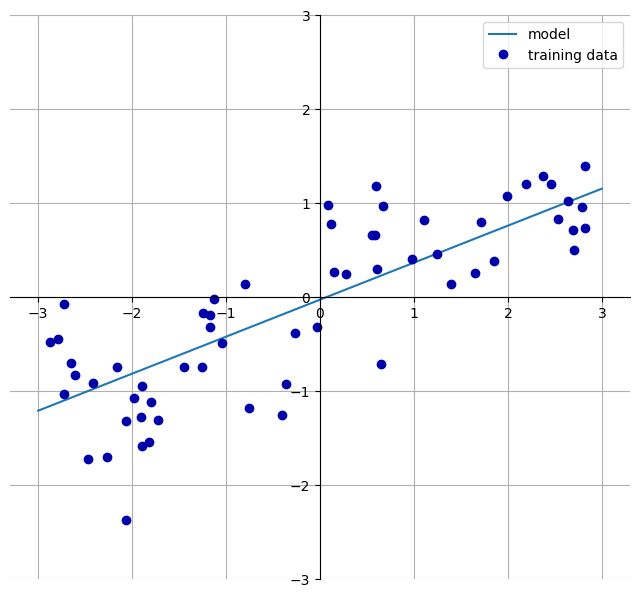

In [2]:
import mglearn as mgl

mgl.plots.plot_linear_regression_wave()

What we can see here is the slope around 0.4, the intercept is where the line crosses the y-axis.

There are many different linear models for regression. The difference between these models lies in how the model parameters w and b are learned from the training data, and how model complexity can be controlled. We will now take a look at the most popular linear models for regression

## Linear Regression (aka Ordinary Least Squares)

This one is the simplest and most classic linear method for regression. It finds the parameters $w$ and $b$ that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values. Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity.

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('data/linear_regression_dataset.csv')

In [5]:
dataset.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [6]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
print("lr coefficents: ", lr.coef_)
print("lr intercept: ", lr.intercept_)

lr coefficents:  [-107.10955305 2095.42641138]
lr intercept:  31619.09724993968


The <code>intercept_</code> attribute holds the single float number, the <code>coef_</code> attribute is a Numpy array with one entry per input feature.

So after training, we have two slopes and one intercepts, which we can use to predict new data points. Let's take a look at the predictions score:

In [9]:
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test, y_test)))

Training score: 0.97
Test score: 0.97


Ok so $\mathbb{R}^2$ is a measure of goodness of fit. It's a value between 0 and 1 for no-fit and perfect fit respectively. So we can see that our model is not very good.

## Ridge Regression

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients ($w$) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of $w$ should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [15]:
print("ridge coefficents: ", ridge.coef_)
print("ridge intercept: ", ridge.intercept_)

ridge coefficents:  [-104.11613814 2078.47752237]
ridge intercept:  31592.940828781037


In [16]:
print("Training score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge.score(X_test, y_test)))

Training score: 0.97
Test score: 0.97


As you can see, the score in both model is the same. But the coefficients are different. Ridge regression applies a penalty to the size of the coefficients, so the coefficients learned by ridge regression are much smaller. This model is more restricted than linear regression, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization. As we are only interested in generalization performance, we should choose the ridge model over the linear regression model.

But we'll have a question: "How much importance the model places on simplicity versus training set performance can be specified by the user?"

Well, the answer is the alpha parameter. In the previous example, we used the default parameter, alpha=1.0. There is no reason why this will give us the best trade-off, though. The optimum setting of alpha depends on the particular dataset we are using. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization. For example:

In [20]:
ridge10 = Ridge(alpha=10)
ridge10.fit(X_train, y_train)

print("rigde10 coefficents: ", ridge10.coef_)
print("rigde10 intercept: ", ridge10.intercept_)

print("Training score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge10.score(X_test, y_test)))

rigde10 coefficents:  [ -79.38287591 1937.66561963]
rigde10 intercept:  31380.78568723035
Training score: 0.96
Test score: 0.95


So increasing alpha forces coefficients to move more toward zero, force it more restricted to avoid overfitting. But what about we decrease alpha?

In [22]:
ridge01 = Ridge(alpha=0.1)
ridge01.fit(X_train, y_train)

print("righe01 coefficents: ", ridge01.coef_)
print("righe01 intercept: ", ridge01.intercept_)

print("Training score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge01.score(X_test, y_test)))

righe01 coefficents:  [-106.80782074 2093.7188261 ]
righe01 intercept:  31616.456393808072
Training score: 0.97
Test score: 0.97


The coefficients and intercept slowly change, a little bit smaller than linear regression. We can easily understand that decrease alpha will make the model less restricted.

We can also get a more qualitative insight into how the alpha parameter changes the model by inspecting the coef_ attribute of models with different values of alpha. A higher alpha means a more restricted model, so we expect the entries of coef_ to have smaller magnitude for a high value of alpha than for a low value of alpha

## Lasso

An alternative to Ridge for regularizing linear regression is **Lasso**. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization. The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Lasso

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso()
lasso.fit(X_train, y_train)

print("lasso coefficents: ", lasso.coef_)
print("lasso intercept: ", lasso.intercept_)

print("Training score: {:.2f}".format(lasso.score(X_train, y_train)))   
print("Test score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

lasso coefficents:  [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  5.44364352e-05 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -3.21298988e-03 -4.31901616e-04
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]
lasso intercept:  1.3492834500519606
Training score: 0.55
Test score: 0.62
Number of features used: 8


As you can see, Lasso does quite badly, both on the training and the test set. This indicates that we are underfitting, and we find that it used only 4 of the 105 features. Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls how strongly coefficients are pushed toward zero. In the previous example, we used the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha. When we do this, we also need to increase the default setting of max_iter (the maximum number of iterations to run)

In [34]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.68
Test set score: 0.71
Number of features used: 8


So lower alpha help us to get better score, which worked better on the training data. The performance on the test set is not as good as Ridge, but seem better than the default setting of alpha=1.0. But how about we decrease alpha more since the score is still increasing?

In [36]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.77
Test set score: 0.75
Number of features used: 22


So that's all about our Regression task between three type of linear models. We can see that Ridge and Lasso are more restricted than Linear Regression, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization. As we are only interested in generalization performance, we should choose the ridge model over the linear regression model.

## Linear models for classification

Linear models are also extensively used for classification. Let's take a look at the binary classification case first. In this case, a prediction is made using the following formula:

$$\hat{y} = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0$$

Formula seem familiar? Yes, it's the same as the regression formula. If the function is smaller than zero, we predict the class -1; if it is larger than zero, we predict the class +1. This prediction rule is common to all linear models for classification. 

Different algorithms choose different ways to measure what "fitting the training set well" means. For technical mathematical reasons, it is not possible to adjust w and b to minimize the number of misclassifications the algorithms produce, as one might hope. For our purposes, and many applications, the different choices for item 1 in the preceding list (called **loss functions**) are of little significance.

The two most popular linear classification algorithms are *logistic regression* and *linear support vector machines* (linear SVMs). Despite its name, logistic regression is a classification algorithm and not a regression algorithm, and it should not be confused with linear regression.

Let's try to apply them

c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


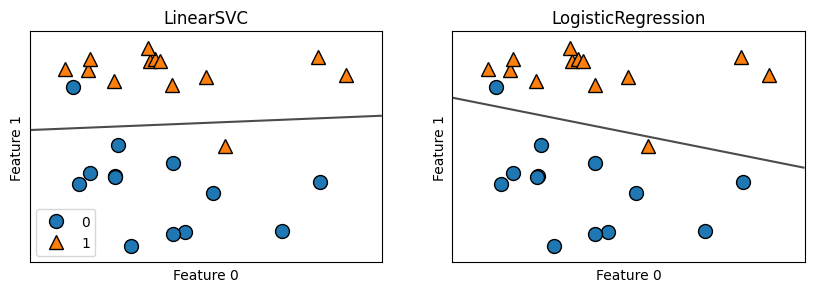

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mgl.datasets.make_forge()

fig, axe = plt.subplots(1, 2, figsize=(10, 3))

for i, ax in zip([LinearSVC(), LogisticRegression()], axe):
    model = i.fit(X, y)
    mgl.plots.plot_2d_separator(model, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mgl.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(i.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axe[0].legend()

The forge dataset features are displayed on x-axis and y-axis, with LinearSVC and LogisticRegression models separating class 1 and 0 areas. Both models have similar decision boundaries, but misclassify two points. They apply L2 regularization, similar to Ridge's regression.

For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called **C**, and higher values of **C** correspond to less regularization. In other words, when you use a high value for the parameter **C**, LogisticRegression and LinearSVC try to fit the training set as best as possible, while with low values of the parameter **C**, the models put more emphasis on finding a coefficient vector (w) that is close to zero.

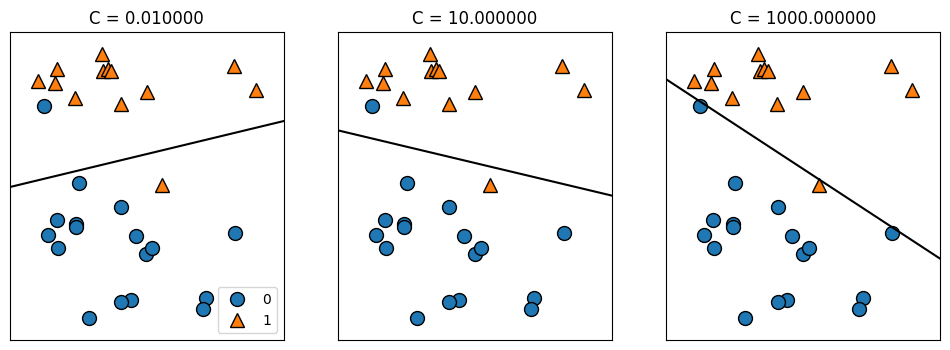

In [38]:
mgl.plots.plot_linear_svc_regularization()

From left to right, we can see that with low values of **C**, the models underfit, while with high values of **C**, the models overfit.

Similarly to the case of regression, linear models for classification might seem very restrictive in low-dimensional spaces, only allowing for decision boundaries that are straight lines or planes. Again, in high dimensions, linear models for classification become very powerful, and guarding against overfitting becomes increasingly important when considering more features.

In [54]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

print("Training score: {:.2f}".format(logr.score(X_train, y_train)))
print("Test score: {:.2f}".format(logr.score(X_test, y_test)))

Training score: 0.95
Test score: 0.96


c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Well, it seem the default C giving us the best score. But how about we increase C?

In [48]:
logr100 = LogisticRegression(C = 100)
logr100.fit(X_train, y_train)

print("Training score: {:.2f}".format(logr100.score(X_train, y_train)))
print("Test score: {:.2f}".format(logr100.score(X_test, y_test)))

Training score: 0.95
Test score: 0.96


c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No big change, it seem reach the best stage. But how about we decrease C?

In [57]:
logr0001 = LogisticRegression(C = 0.001)
logr0001.fit(X_train, y_train)

print("Training score: {:.2f}".format(logr0001.score(X_train, y_train)))
print("Test score: {:.2f}".format(logr0001.score(X_test, y_test)))

Training score: 0.94
Test score: 0.96


c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The training score decrease 1 percent, let take a look more detail

Training accuracy of l1 logreg with C=0.001: 0.94
Test accuracy of l1 logreg with C=0.001: 0.96
Training accuracy of l1 logreg with C=1.000: 0.95
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.95
Test accuracy of l1 logreg with C=100.000: 0.96


c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

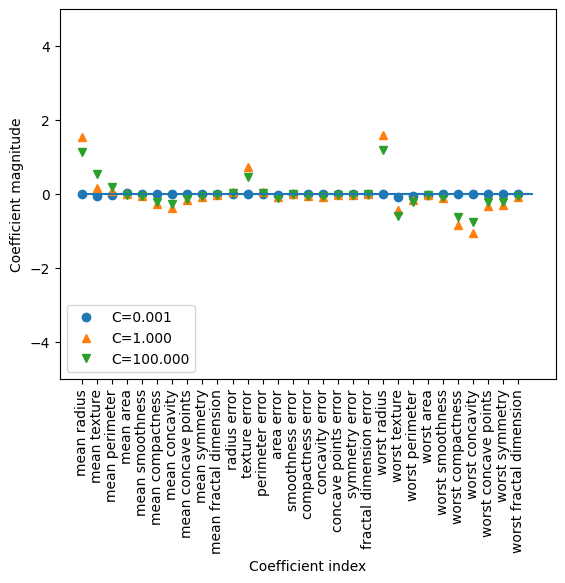

In [56]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l2").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

As in regression, the main difference between the models is the penalty parameter, which influences the regularization and whether the model will use all available features or select only a subset

## Linear models for multiclass classification

Many linear classification models are for binary classification only, and don’t extend
naturally to the multiclass case. A easiest us to use one of the strategies for reducing a multiclass classification problem to binary classification. One of these strategies is the **one-vs.-rest** approach, also called **one-vs.-all**.

Let’s apply the one-vs.-rest method to a simple three-class classification dataset. We use a two-dimensional dataset, where each class is given by data sampled from a Gaussian distribution 

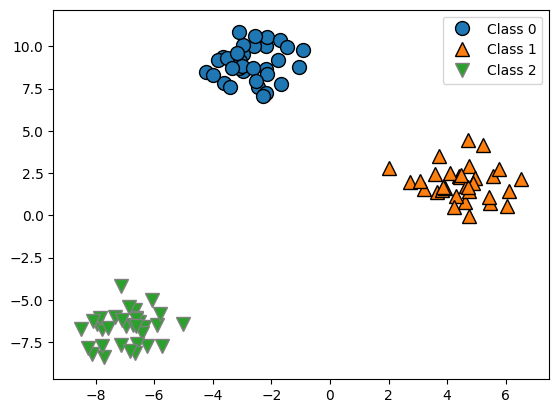

In [60]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mgl.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1", "Class 2"])

Now we train LinearSVC on the dataset:

In [61]:
lsvm = LinearSVC().fit(X, y)

print("Coefficient shape: ", lsvm.coef_.shape)
print("Intercept shape: ", lsvm.intercept_.shape)

print("Decision function shape: ", lsvm.decision_function(X).shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)
Decision function shape:  (100, 3)


c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


We can see that the shape of the coefficient is 3, like some previous example I'm using, the data have more than 2 features, so the shape of the coefficient is 3. The shape of the intercept is 3, too. So we can see that the model is using one-vs.-rest strategy.

Let's put it on the broad for more detail:

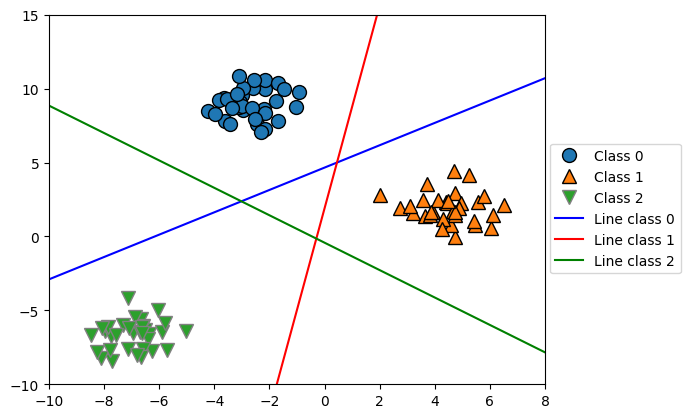

In [68]:
# mgl.plots.plot_2d_classification(lsvm, X, fill=True, alpha=.6)
mgl.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(lsvm.coef_, lsvm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

You can uncomment the code to see the result. We can see that the decision boundary is linear, and separates the classes fairly well. The triangle, circle, and square are the test points. The black crosses are the predictions made by the one-vs.-rest classifier, where each label is shown by a different color. All the test points are classified correctly.

## Pros and cons of linear models

Linear models are very fast to train, and also fast to predict. They scale to very large datasets and work well with sparse data. If your data consists of hundreds of thousands or millions of samples, you might want to investigate using the <code>solver='sag'</code> option in LogisticRegression and Ridge, which can be faster than the default on large datasets. Other options are the <code>SGDClassifier</code> class and the <code>SGDRegressor</code> class, which implement even more scalable versions of the linear models described here. The other benefit of linear models is that they make it relatively easy to understand how a prediction is made, using the formulas we saw earlier for regression and classification. Unfortunately, in lower-dimensional spaces, linear models are often outperformed by other models.

Well, we have learned about linear models, how they work, how to use them, and how to control their parameters. In the next chapter, we will learn about Naive Bayes Classifiers.